# Police Data Insights

Due to recent discussions around Police brutality and police racism, I have decided to look at the open source police data in the UK for the Metropolitan Police Service. This notebook attempts to provide some insights into how the Met Police conducts itself in relation to the public it is meant to protect.

In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz
plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In [110]:
sas = pd.read_csv("data/police_data/2020-05/2020-05-metropolitan-stop-and-search.csv")
sas_d = sas.drop(columns=["Part of a policing operation", "Policing operation", "Outcome linked to object of search", "Removal of more than just outer clothing"])
sas_d = sas_d.dropna()
sas_d["index"] = sas_d.index
keys = sas_d.keys()
for key in keys:
        print("Key: {}, Data: {}".format(key, sas_d[key].unique()))

Key: Type, Data: ['Person search' 'Person and Vehicle search' 'Vehicle search']
Key: Date, Data: ['2020-04-30T23:01:00+00:00' '2020-04-30T23:02:00+00:00'
 '2020-04-30T23:05:00+00:00' ... '2020-05-31T22:53:00+00:00'
 '2020-05-31T22:54:00+00:00' '2020-05-31T22:55:00+00:00']
Key: Latitude, Data: [51.367405 51.545923 51.464974 ... 51.473521 51.63584  51.420542]
Key: Longitude, Data: [-0.178765 -0.112096 -0.130152 ... -0.367017 -0.086081 -0.047495]
Key: Gender, Data: ['Male' 'Female' 'Other']
Key: Age range, Data: ['25-34' '18-24' 'over 34' '10-17' 'under 10']
Key: Self-defined ethnicity, Data: ['Other ethnic group - Not stated' 'White - Any other White background'
 'White - Irish' 'Asian/Asian British - Pakistani'
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background'
 'Black/African/Caribbean/Black British - African'
 'Other ethnic group - Any other ethnic group'
 'White - English/Welsh/Scottish/Northern Irish/British'
 'Asian/Asian British - Any other Asi

# Graph Data

The insights below are displayed on graphs. These aim to show the relationships between different elements of the dataset.

<Figure size 432x288 with 0 Axes>

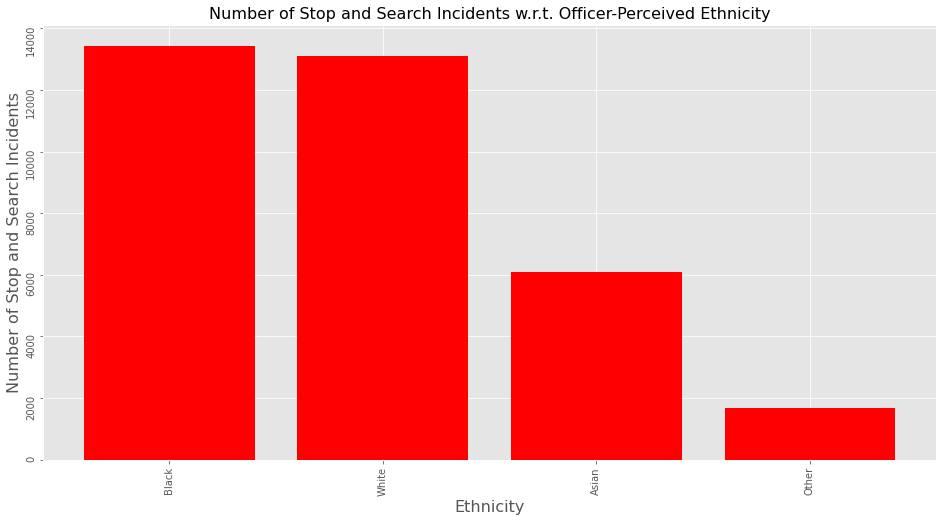

In [111]:
officer_eth_count = sas_d.groupby(['Officer-defined ethnicity']).size().reset_index().rename(columns={0:'eth_count'})

sorted_vals = officer_eth_count.sort_values(by="eth_count", ascending=False)

fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.bar(sorted_vals["Officer-defined ethnicity"], sorted_vals['eth_count'], color='red')
plt.xlabel("Ethnicity")
plt.xticks(rotation=90)
plt.ylabel("Number of Stop and Search Incidents")
plt.yticks(rotation=90)
plt.title("Number of Stop and Search Incidents w.r.t. Officer-Perceived Ethnicity")
plt.show()

<Figure size 432x288 with 0 Axes>

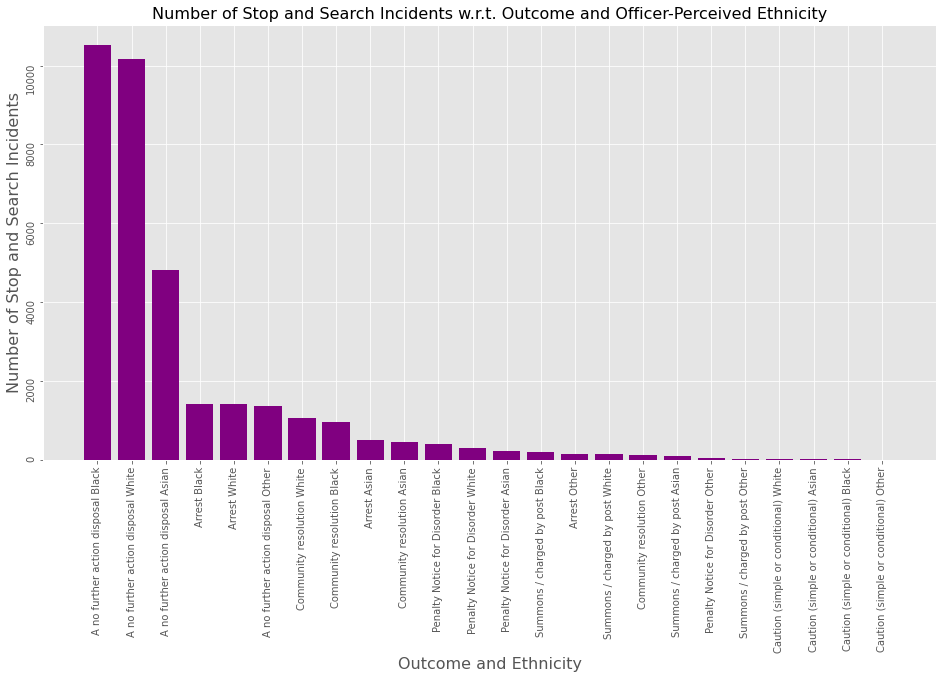

In [119]:
outcome_officer_eth = sas_d.groupby(['Outcome','Officer-defined ethnicity']).size().reset_index().rename(columns={0:'outcome_eth_count'})

sorted_vals = outcome_officer_eth.sort_values(by="outcome_eth_count", ascending=False)

sorted_vals["Outcome-Ethnicity"] = sorted_vals["Outcome"] + " " + sorted_vals['Officer-defined ethnicity']

fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.bar(sorted_vals["Outcome-Ethnicity"], sorted_vals['outcome_eth_count'], color='purple')
plt.xlabel("Outcome and Ethnicity")
plt.xticks(rotation=90)
plt.ylabel("Number of Stop and Search Incidents")
plt.yticks(rotation=90)
plt.title("Number of Stop and Search Incidents w.r.t. Outcome and Officer-Perceived Ethnicity")
plt.show()

<Figure size 432x288 with 0 Axes>

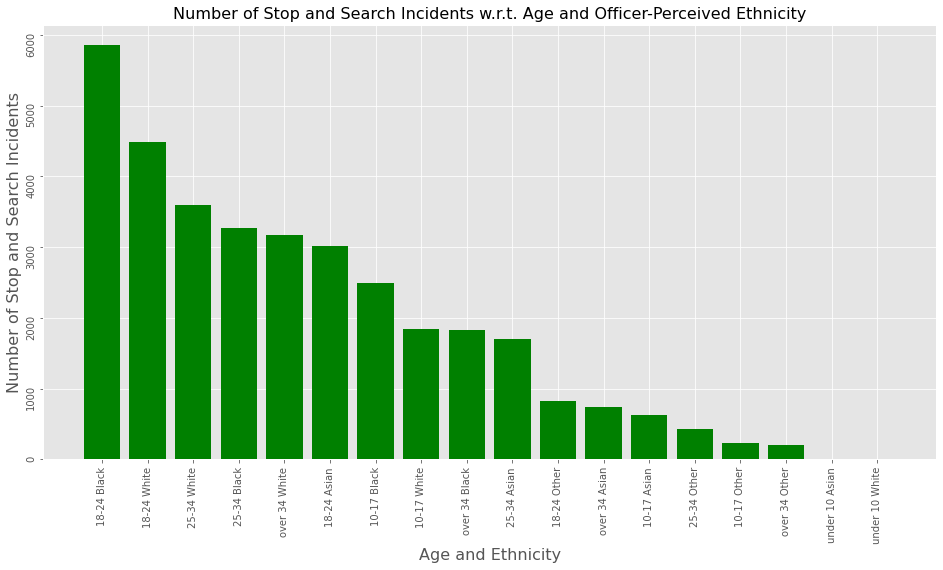

In [113]:
age_officer_eth = sas_d.groupby(['Age range','Officer-defined ethnicity']).size().reset_index().rename(columns={0:'age_eth_count'})

sorted_vals = age_officer_eth.sort_values(by="age_eth_count", ascending=False)

sorted_vals["Age-Ethnicity"] = sorted_vals["Age range"] + " " + sorted_vals['Officer-defined ethnicity']

fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.bar(sorted_vals["Age-Ethnicity"], sorted_vals['age_eth_count'], color='green')
plt.xlabel("Age and Ethnicity")
plt.xticks(rotation=90)
plt.ylabel("Number of Stop and Search Incidents")
plt.yticks(rotation=90)
plt.title("Number of Stop and Search Incidents w.r.t. Age and Officer-Perceived Ethnicity")
plt.show()

<Figure size 432x288 with 0 Axes>

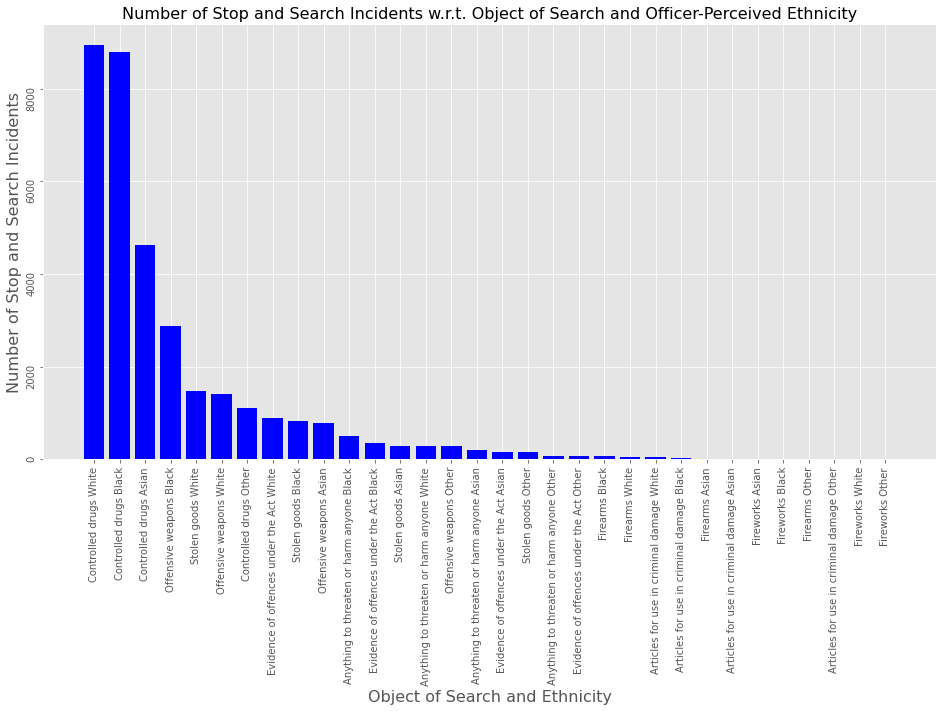

In [114]:
offence_officer_eth = sas_d.groupby(['Object of search','Officer-defined ethnicity']).size().reset_index().rename(columns={0:'offence_eth_count'})


sorted_vals = offence_officer_eth.sort_values(by="offence_eth_count", ascending=False)

sorted_vals["Object-Ethnicity"] = sorted_vals["Object of search"] + " " + sorted_vals['Officer-defined ethnicity']

fig = plt.figure()
plt.figure(figsize=(16, 8))
plt.bar(sorted_vals["Object-Ethnicity"], sorted_vals['offence_eth_count'], color='blue')
plt.xlabel("Object of Search and Ethnicity")
plt.xticks(rotation=90)
plt.ylabel("Number of Stop and Search Incidents")
plt.yticks(rotation=90)
plt.title("Number of Stop and Search Incidents w.r.t. Object of Search and Officer-Perceived Ethnicity")
plt.show()



# Map-based data

The below data is based on location data. It displays insights based on the location at which the stop and search incidents occured.

In [115]:
def visualise(df, properties,category_color_stops,colour_prop):
    # Must be a public token, starting with `pk`
    token = "pk.eyJ1IjoiZnJlZGRpZXhkIiwiYSI6ImNrY2RmdHd4cTBlMWoycnA5bWRnbWkwbHYifQ.6i57_lZuZeIyxbxMg8tyow"

    # Create a geojson file export from a Pandas dataframe
    data = df_to_geojson(df,
                  properties=properties,
                  lat='Latitude', lon='Longitude', precision=3)
    # Create the viz from the dataframe

    viz = CircleViz(data, 
                    access_token=token,
                    height='500px',
                    color_property=colour_prop,
                    color_default='grey',
                    color_function_type='match',
                    color_stops=category_color_stops,
                    radius=2,
                    center=(-0.1, 51.5),
                    zoom=9)

    viz.show()

In [116]:
properties = ['Gender', 'Officer-defined ethnicity']
category_color_stops = [['Black', 'rgb(211,47,47)'],  
                            ['White', 'rgb(81,45,168)'], 
                            ['Asian', 'rgb(2,136,209)'],
                           ['Other', 'rgb(60, 124, 30)']]
colour_prop = 'Officer-defined ethnicity'
visualise(sas_d, properties,category_color_stops,colour_prop)

/Library/Python/3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [117]:
crime = pd.read_csv("data/police_data/2020-05/2020-05-metropolitan-outcomes.csv")
crime_d = crime.drop(columns=["Crime ID", "Location", "Reported by", "Falls within", "LSOA code"])
keys = crime_d.keys()
# sas_d = sas_d.dropna()
for key in keys:
        print("Key: {}, Data: {}".format(key, crime_d[key].unique()))

Key: Month, Data: ['2020-05']
Key: Longitude, Data: [-0.133633 -0.205582 -0.193713 ... -0.214531 -0.127691 -0.093319]
Key: Latitude, Data: [51.51233  51.529046 51.522956 ... 51.550135 51.419585 51.435757]
Key: LSOA name, Data: ['Westminster 013F' 'Westminster 004E' 'Westminster 006E' ...
 'Barnet 004C' 'Richmond upon Thames 010A' 'Ipswich 012G']
Key: Outcome type, Data: ['Suspect charged' 'Offender given a caution'
 'Unable to prosecute suspect'
 'Formal action is not in the public interest'
 'Suspect charged as part of another case' 'Local resolution'
 'Offender given a drugs possession warning'
 'Offender given penalty notice'
 'Investigation complete; no suspect identified']
